In [ ]:
ExchangeData = {}

In [ ]:
import pandas as pd ## First attempt, I think it works but i gave up on it
import seaborn as sns
from Quest1 import listofDates
import json
import os
import random

dates = listofDates()
date = random.choice(dates)
bases=[]

for name in os.listdir("Rates"):
    bases.append(name)

base = random.choice(bases)
df = pd.read_json(f"./Rates/{base}/{date}_exchange_rates_{base}.json")

ExchangeRates = []
for i in range(len(df['channel']['item'])):
    ExchangeRates.append((df['channel']['item'][i]['targetCurrency'], df['channel']['item'][i]['exchangeRate'])) ## Learning recursion for json ## Put each exchange rate and country in a tuple

ExchangeData[date] = ExchangeRates

print(base)
print(json.dumps(ExchangeData, indent=4))

In [75]:
bases=[]

for name in os.listdir("Rates"):
    bases.append(name)

print(bases)

['IDR', 'KRW']


In [110]:
dates = listofDates()      ## Second attempt, I think this one is better for fetching the data efficiently

## Change these two depending on what you want to see!! and whats available for the bases, shown in the block above ^
base="KRW"
TargetCurrency = "USD" 


for date in dates:
    df = pd.read_json(f"./Rates/{base}/{date}_exchange_rates_{base}.json")
    for item in df['channel']['item']:
        if item['targetCurrency'] == TargetCurrency:
            ExchangeData[date] = item['exchangeRate']
            break

print(ExchangeData[random.choice(dates)]) ## A random dates exchange rate data just to test

0.000894


<function matplotlib.pyplot.show(close=None, block=None)>

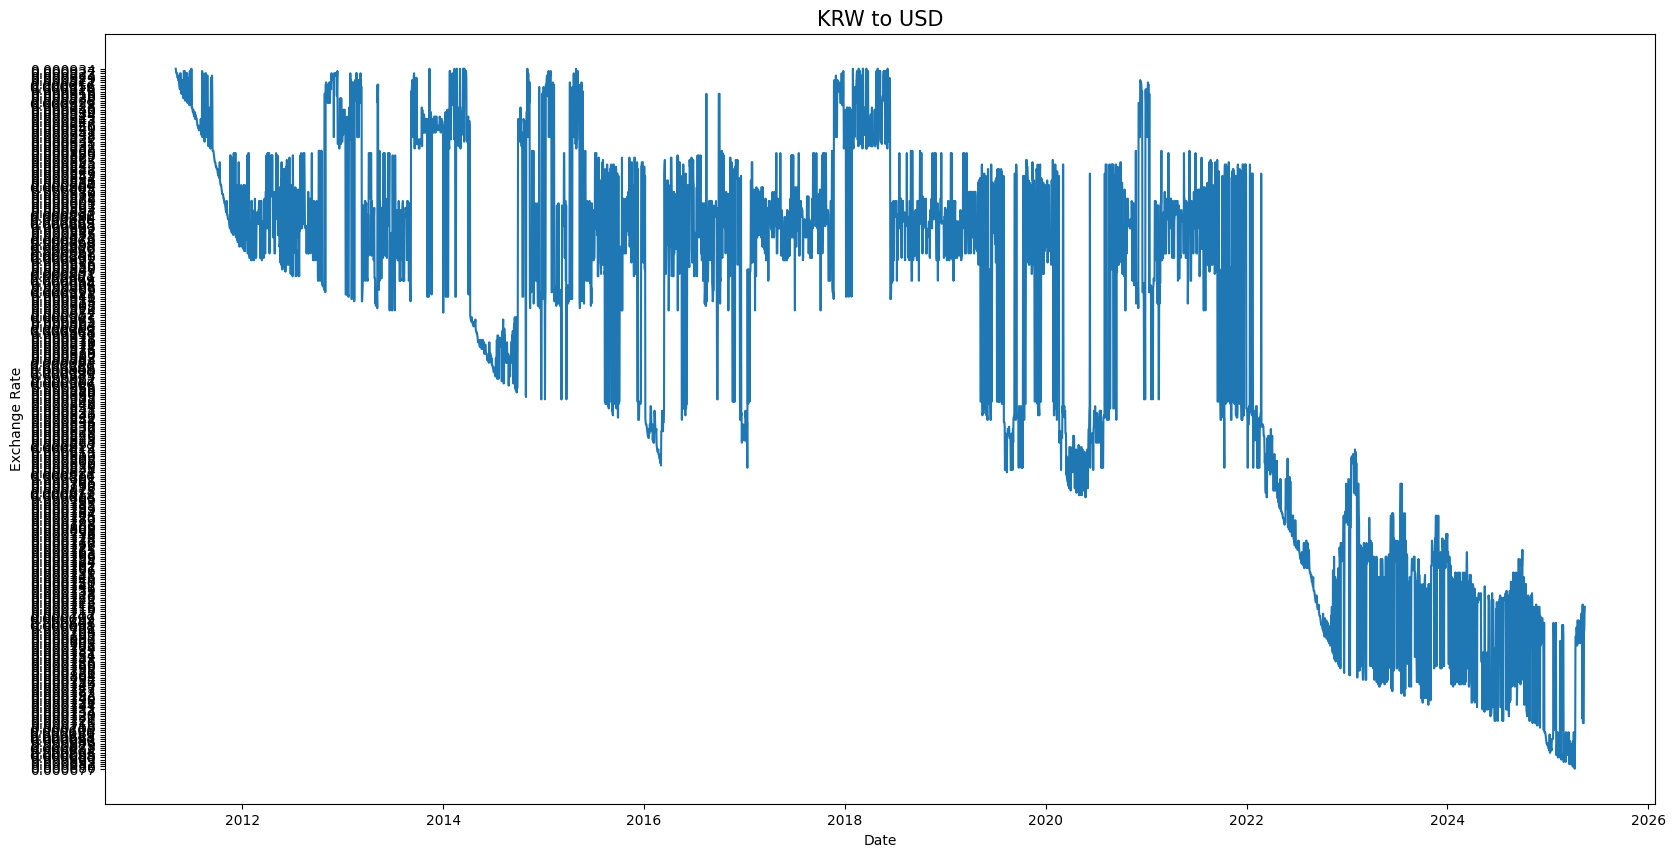

In [111]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.DataFrame(list(ExchangeData.items()), columns=["date", "rate"]) ## These 3 lines were from chatgpt, I was very stuck with formatting the data :/
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace=True)


plt.figure(figsize=(20, 10))
sns.lineplot(x="date", y="rate", data=df)
plt.title(f"{base} to {TargetCurrency}", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")



#plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))  ## Chatgpt also helped with these 2 lines, without them the y axis was showing every variable and was ugly and unreadable
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.2f}"))  

# I think this may have messed with the data though? the graph shows 60 at the bottom which I know isnt correct
plt.show

<h1> Strange Data Gallery

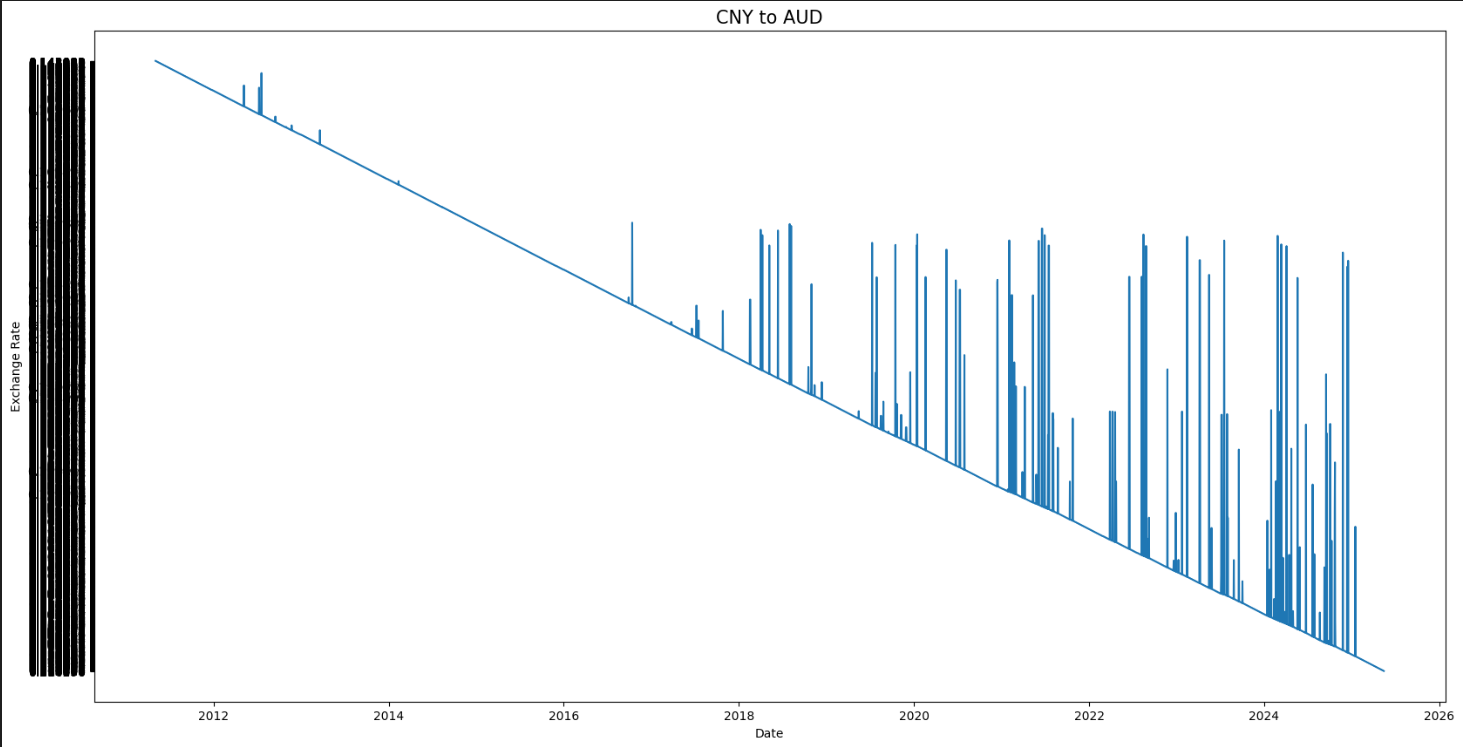

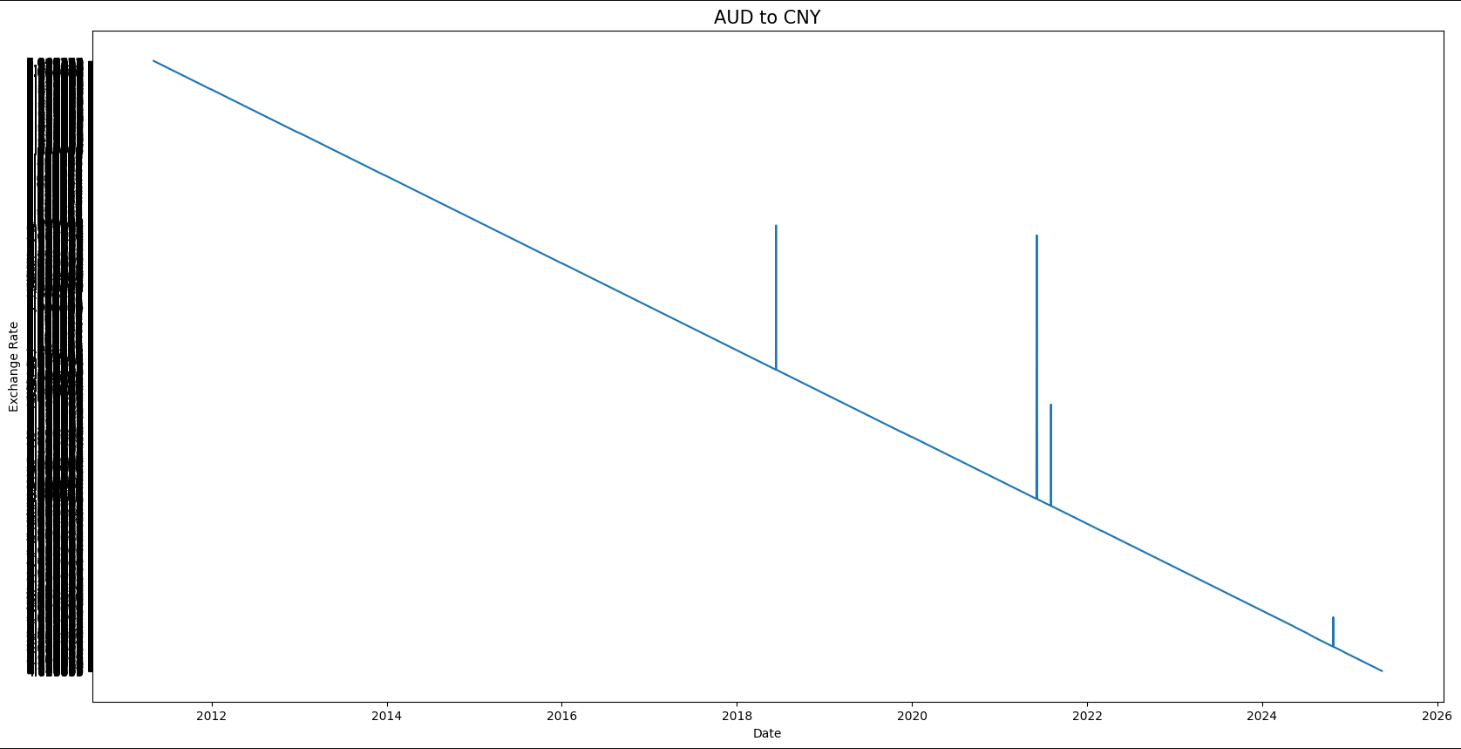

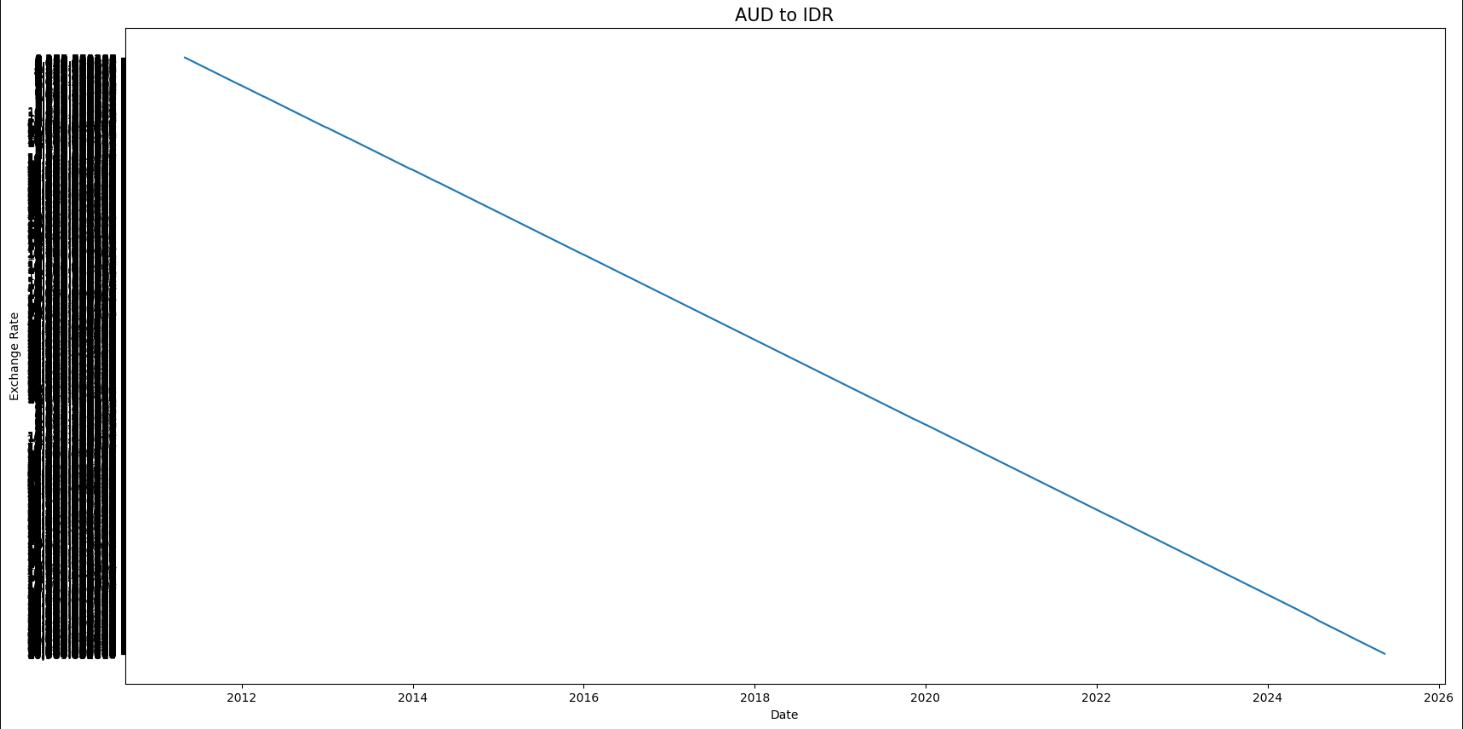

<h1> Normal data Example

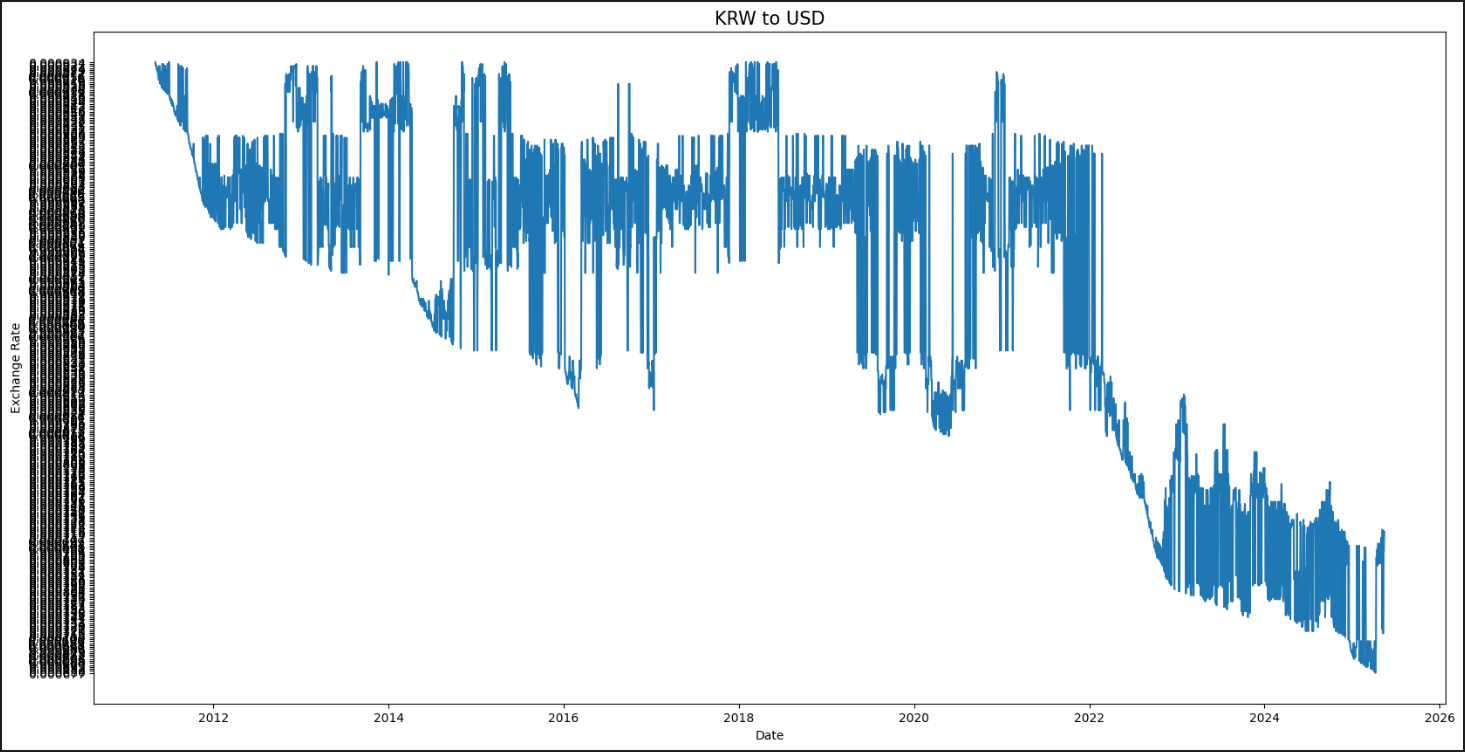